# MAE 6286: week 3 class practice 1

## Make things work first

The first stage of code and software development is alway to ***make it work***. So before you go home and read/learn the beauty of Python in [lesson 3 notebook](https://nbviewer.jupyter.org/github/numerical-mooc/numerical-mooc/blob/5a894f2c7c525a0a4bd5809bb78ba72ca616c40f/lessons/01_phugoid/01_03_PhugoidFullModel.ipynb), let's write some code that may not look elegant but can do the job, which is to solve the full phugoid motion with Euler method.

Once you finish the practice in this notebook, you then can go back to the lesson 3 notebook again and learn how to improve your code here with:

* `function`
* slicing with a `numpy` array
* array arithmetic

You can also how to make the figures nicer with more functions from `pyplot`.

### Full phugoid motion model

Here's the equation of full phugoid motion.

\begin{equation}
\left\{
\begin{aligned}
&v' = -g\sin{\theta} - \frac{C_D}{C_L}\frac{g}{v_t^2}v^2 \\
&\theta' = -\frac{g}{v}\cos{\theta} + \frac{g}{v_t^2}v \\
&x' = v\cos{\theta} \\
&y' = v\sin{\theta}
\end{aligned}
\right.
\end{equation}

And initial condition (i.e., the values of $v$, $\theta$, $x$, and $y$ at time $t=0$):

\begin{equation}
\left\{
\begin{aligned}
&v(0) = v_0 \\
&\theta(0) = \theta_0 \\
&x(0) = x_0 \\
&y(0) = y_0 
\end{aligned}
\right.
\end{equation}

### Euler method

To solve the system of ODE of the full phugoid motion with Euler method, we re-write the eqautions:

\begin{equation}
\mathbf{u}^{n+1} = \mathbf{u}^n + \Delta t \cdot f(\mathbf{u^n})
\end{equation}

where

\begin{equation}
\mathbf{u}^n =
\left[
\begin{array}{c}
v^n \\
\theta^n \\
x^n \\
y^n
\end{array}
\right]
\text{, }
\mathbf{u}^{n+1} =
\left[
\begin{array}{c}
v^{n+1} \\
\theta^{n+1} \\
x^{n+1} \\
y^{n+1}
\end{array}
\right]
\text{, and }
f(\mathbf{u}^n) = 
\left[
\begin{array}{c}
-g\sin{\theta^n} - \frac{C_D}{C_L}\frac{g}{v_t^2}\left(v^n\right)^2 \\
-\frac{g}{v^n}\cos{\theta^n} + \frac{g}{v_t^2}v^n \\
v^n\cos{\theta^n} \\
v^n\sin{\theta^n}
\end{array}
\right]
\end{equation}

### Import packages

In this practice, we'll use the `numpy` package and the sub-package `pyplot` from `matplotlib`.

In [2]:
import numpy
from matplotlib import pyplot

## Part A. Implement a full phugoid motion solver with Euler method

### Set up constants

There are several constants we need to provide to the full phugoid motion model: gravity acceleration, drag coefficient, lift coefficient, and trim velocity.

In the code cell below, complete the code by assigning the following values to the corresponding variables:
* gravity acceleration: 9.81 m/s^2
* drag coefficient: 1.0 / 40.0
* lift coefficient: 1.0
* trim velocity: 30 m/s

In [3]:
# gravity acceleration; unit: m/s^2
g = 9.81

# drag coefficient; dimensionless
CD = 1.0/40.0

# drag coefficient; dimensionless
CL = 1.0

# trim velocity; unit: m / s
vt = 30.0

Now if you look carefully into the equations, you should find that the equations don't really use the trim velocity $v_t$ at all. Instead, it uses the square of the trim velocity, $v_t^2$. So let's define another constant for the square of the trim velocity, and we won't have to calculate the square everytime.

**Hint**: do not assigne a scalar value directly to the variable; try to use the `vt` variable defined above.

In [4]:
# the square of the trim velocity; do not assign value directly; 
vt2 = vt **2

Now we need to determine the values for the initial conditions, i.e., $v_0$, $\theta_0$, $x_0$, and $y_0$. In this practice, we use:
* $v_0$ is equal to the trim velocity (unit: m/s)
* $\theta_0 = 0.0$ (unit: rad)
* $x_0 = 0.0$ (unit: m)
* $y_0 = 1000.0$ (unit: m)

In [5]:
# velocity at t = 0s; unit: m / s
v0 = vt

# angle between trajectory and horizontal at t = 0s; unit: rad
theta0 = 0.0

# x-coordinate at t = 0s; unit: m
x0 = 0.0

# y-coordinate at t = 0s; unit: m
y0 = 1000.0

We need to determine how long our phugoid motion lasts, that is, the final time $T$. In this practice, we want the final time $T$ to be $100$ (in seconds). And we also want to know the varaible values at every $0.1$ second, i.e., $\Delta t=0.1$. In other words, at the end of the phugoid motion calculation, we should have the values of $v$, $\theta$, $x$, and $y$ at $t=0,\ 0.1,\ 0.2,\ 0.3,\ \dots,\ 99.8,\ 99.9,\ 100$.

In [7]:
# final T in seconds
T = 100

# time step
dt = 0.1

# the number of time steps from t=0 to t=100
N = T / dt

In [13]:
int(N)

1000

Next, we want to have an array to hold all variable values at all time points. We know there will be $N$ time points on the timeline, and we know at each time point we have $4$ values (i.e., $v$, $\theta$, $x$, & $y$). This implies that we can use a $N$ by $4$ 2D array to hold the values. When we create the array, we don't have to worry about the values in the array, because we will update the array with correct values in Euler method. So let's simply use [`numpy.zeros`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) to create such an array.

In [18]:
# an array to hold variables at each time point
u = numpy.zeros ( (int(N), 4) )

When we try to access a value in the 2D array `u` above, we need two indices: the first index represents the time point, and the second index represents which variable. For example, if we want to access the $x$ coordinate at the seventh time point (i.e., $t=6\Delta t$), we can use `u[6, 2]` to get the value. Note in Python, indices start from $0$.

Now, assign the initial conditions to the corresponding indices in the array `u`.

In [19]:
# assign v0 to the correct index in u
u[0, 0] = v0

# assign theta0 to the correct index in u
u[0,1] = theta0

# assign x0 to the correct index in u
u[0,2] = x0

# assign y0 to the correct index in u
u[0,3] = y0

Now let's update the values at $n=1,\ 2,\ 3,\ \dots,\ N-1$, which represent the time points at $t=0.1,\ 0.2,\ \dots,\ T$. We use Euler method here.

In [44]:
# iteration through Euler method
# the loop should loop through n=0, 1, 2, ..., N-2
for n in range(N-1):

    # extract v at the n-th time point from the array u
    v_n = u [n, 0 ]
    
    # extract theta at the n-th time point from the array u
    theta_n = u [ n, 1 ]
    
    # extract x at the n-th time point from the array u
    x_n = u [ n, 2 ]
    
    # extract y at the n-th time point from the array u
    y_n = u [ n, 3 ]

    # f(u^n) in the right-hand-side
    f_n = numpy.array([- (g*numpy.sin(theta_n)) - ((CD/CL)*(g/vt2)*(v_n**2)),
                       ( -(g/v_n)*numpy.cos(theta_n)) + (g*v_n/vt2),
                       v_n*numpy.cos(theta_n),
                       v_n*numpy.sin(theta_n) ] )

    # update values at n+1 by Euler method: u^{n+1} = u^{n} + dt * f(u^{n})
    u[n+1] = u[n] + dt*f_n

We should now have values at all time steps. Let's plot the $x$ and $y$ coordinates of the flight! Here we use slicing techniques to do the plotting. But the main purpose of this practice is to understand the logic of Euler method and to learn how to write a ODE solver from scratch, so I'll do the slicing and plotting for you. After executing the next cell, you should be able to see the plot, and the plot should be exactly the same as the one in lesson 3 notebook.

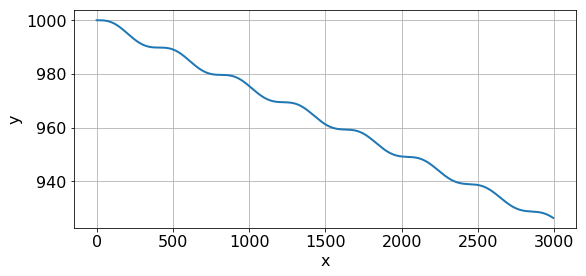

In [45]:
%matplotlib inline
pyplot.rcParams['font.size'] = 16
pyplot.figure(figsize=(9.0, 4.0))
pyplot.grid()
pyplot.plot(u[:, 2], u[:, 3], color='C0', linestyle='-', linewidth=2 );
pyplot.xlabel('x')
pyplot.ylabel('y');

## Part B. Calculate the order of convergence

We know the numerical error of Euler method is propotional to the size of $\Delta t$. That implies if we have a solution calculated with $\Delta t$, and now we calculate a new solution with $\Delta t_{new}=\frac{1}{2}\Delta t$, we should see the error reduces by a factor of 2.

But to calculate the error, we need to know tho analytical solution, which may not be known to us. So we also learned how to calculate the order of convergence, $p$, with anther method:

\begin{equation}
p = \frac{log_{10}\frac{f_3-f_2}{f_2-f_1}}{log_{10}r}
\end{equation}

where $f_1$, $f_2$, and $f_3$ represent the solutions with the smallest, medium, and largest $\Delta t$. And $r$ is the ratio between the $\Delta t$. That is, $\Delta t_{smallest}=\frac{1}{r}\Delta t_{medium}$, and $\Delta t_{medium}=\frac{1}{r}\Delta t_{largest}$. And

\begin{equation}
\left\{
\begin{aligned}
f_3-f_2=\sum_{n=0}^{N_3-1}\Delta t_3\left(abs(v_3^n-v_2^{r\cdot n})+abs(\theta_3^n-\theta_2^{r\cdot n})+abs(x_3^n-x_2^{r\cdot n})+abs(y_3^n-y_2^{r\cdot n})\right) \\
f_2-f_1=\sum_{n=0}^{N_2-1}\Delta t_2\left(abs(v_2^n-v_1^{r\cdot n})+abs(\theta_2^n-\theta_1^{r\cdot n})+abs(x_2^n-x_1^{r\cdot n})+abs(y_2^n-y_1^{r\cdot n})\right) \\
\end{aligned}
\right.
\end{equation}

Now use the logic developed in Part A to calculate the order of convergence, $p$, by completing the following code.

In [81]:
# ratio
r = 2

# time steps
dt_coarsest = 0.004
dt_medium = dt_coarsest/ 2
dt_finest = dt_medium / 2

# N for different time step sizes
N_coarsest = int ( T / dt_coarsest )
N_medium = int (T / dt_medium )
N_finest = int (T/dt_finest )

# initial u arrays holding variables to all time points
u_coarsest = numpy.zeros ( ( N_coarsest, 4 ) )
u_medium = numpy.zeros ( ( N_medium, 4 ) )
u_finest = numpy.zeros ( ( N_finest, 4 ) )

# assign initial conditions to correct locations in u_coarsest, u_medium, and u_finest
# assign v0 to the correct index in u
u_coarsest[0, 0] = v0
u_medium[0, 0] = v0
u_finest[0, 0] = v0

# assign theta0 to the correct index in u
u_coarsest[0,1] = theta0
u_medium[0,1] = theta0
u_finest[0,1] = theta0

# assign x0 to the correct index in u
u_coarsest[0,2] = x0
u_medium[0,2] = x0
u_finest[0,2] = x0

# assign y0 to the correct index in u
u_coarsest[0,3] = y0
u_medium[0,3] = y0
u_finest[0,3] = y0 

# iteration through Euler method for dt_coarsest
# n = 0, 1, 2, ..., N_coarsest-2
for n in range(N_coarsest-1):

    # extract v at the n-th time point from the array u
    v_n = u_coarsest [n, 0 ]
    
    # extract theta at the n-th time point from the array u
    theta_n = u_coarsest [ n, 1 ]
    
    # extract x at the n-th time point from the array u
    x_n = u_coarsest [ n, 2 ]
    
    # extract y at the n-th time point from the array u
    y_n = u_coarsest [ n, 3 ]

    # f(u^n) in the right-hand-side
    f_n = numpy.array([- (g*numpy.sin(theta_n)) - ((CD/CL)*(g/vt2)*(v_n**2)),
                       ( -(g/v_n)*numpy.cos(theta_n)) + (g*v_n/vt2),
                       v_n*numpy.cos(theta_n),
                       v_n*numpy.sin(theta_n) ] )

    # update values at n+1 by Euler method: u^{n+1} = u^{n} + dt * f(u^{n})
    u_coarsest[n+1] = u_coarsest[n] + dt_coarsest*f_n

# iteration through Euler method for dt_medium
# n = 0, 1, 2, ..., N_medium-2
for n in range(N_medium-1):

    # extract v at the n-th time point from the array u
    v_n = u_medium [n, 0 ]
    
    # extract theta at the n-th time point from the array u
    theta_n = u_medium [ n, 1 ]
    
    # extract x at the n-th time point from the array u
    x_n = u_medium [ n, 2 ]
    
    # extract y at the n-th time point from the array u
    y_n = u_medium [ n, 3 ]

    # f(u^n) in the right-hand-side
    f_n = numpy.array([- (g*numpy.sin(theta_n)) - ((CD/CL)*(g/vt2)*(v_n**2)),
                       ( -(g/v_n)*numpy.cos(theta_n)) + (g*v_n/vt2),
                       v_n*numpy.cos(theta_n),
                       v_n*numpy.sin(theta_n) ] )

    # update values at n+1 by Euler method: u^{n+1} = u^{n} + dt * f(u^{n})
    u_medium[n+1] = u_medium[n] + dt_medium*f_n

# iteration through Euler method for dt_finest
# n = 0, 1, 2, ..., N_finest-2
for n in range(N_finest-1):

    # extract v at the n-th time point from the array u
    v_n = u_finest [n, 0 ]
    
    # extract theta at the n-th time point from the array u
    theta_n = u_finest [ n, 1 ]
    
    # extract x at the n-th time point from the array u
    x_n = u_finest [ n, 2 ]
    
    # extract y at the n-th time point from the array u
    y_n = u_finest [ n, 3 ]

    # f(u^n) in the right-hand-side
    f_n = numpy.array([- (g*numpy.sin(theta_n)) - ((CD/CL)*(g/vt2)*(v_n**2)),
                       ( -(g/v_n)*numpy.cos(theta_n)) + (g*v_n/vt2),
                       v_n*numpy.cos(theta_n),
                       v_n*numpy.sin(theta_n) ] )

    # update values at n+1 by Euler method: u^{n+1} = u^{n} + dt * f(u^{n})
    u_finest[n+1] = u_finest[n] + dt_finest*f_n

We now have $f_1$, $f_2$, and $f_3$, which are the `u_finest`, `u_medium`, and `u_coarsest` in our code. Let try to calculate $f_3-f_2$ and $f_2-f_1$.

In [82]:
# initialize the variable f32 with zero to represent f3-f2
f32 = 0.0

In [83]:
# loop through n=0, 1, ..., N_coarsest-1 to sum up the difference in solutions
for n in range(N_coarsest):
    
    # add the absolute value between v with largest and medium dt at time point n
    f32 = f32 + numpy.abs(u_coarsest[n, 0] - u_medium[r*n, 0]) + numpy.abs(u_coarsest[n,1] - u_medium[r*n,1])
    + numpy.abs(u_coarsest[n,2]-u_medium[r*n,2]) + numpy.abs(u_coarsest[n,3] - u_medium[r*n, 3])


In [84]:
# Now multiply the f32 with coarsest dt
f32 = f32 * dt_coarsest

In [85]:
# initialize the variable f21 with zero to represent f2-f1
f21 =0.0

In [86]:
# loop through n=0, 1, ..., N_medium-1 to sum up the difference in solutions

for n in range(N_medium):
    
    # add the absolute value between v with largest and medium dt at time point n
    f21 = f21 + numpy.abs(u_medium[n, 0] - u_finest[r*n, 0]) + numpy.abs(u_medium[n,1] - u_finest[r*n,1])
    + numpy.abs(u_medium[n,2]-u_finest[r*n,2]) + numpy.abs(u_medium[n,3] - u_finest[r*n, 3])


In [87]:
# Now multiply the f32 with medium dt
f21 = f21 * dt_medium
# <-- complete the code following the same loging in calculating f32 -->

In [88]:
# calculate p = log(f32/f21) / log(r); you can use numpy.log10
p = numpy.log(f32/f21) / numpy.log(r)

In [89]:
# after printing out the p, you should get a value around 1.0139
print(p)

1.013852749390789
